# Ice Sheets and Climate - Eric Keenan - Homework # 2

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [46]:
# Function to load in aws data
def aws_timeseries(file_path, column_num):

    # File Path (absolute path)
    file_path = file_path

    # Get number of timesteps
    with open(file_path, 'r') as myfile:
        data = myfile.readlines()
    rows = len(data)

    # Get data
    time = []
    value = []
    for j in range(0, rows):
        line = data[j][:]
        
        # Parse the line
        line = line.split()
        time.append(datetime.strptime(line[0],'%Y/%m/%d'))
        value.append(float(line[column_num]))

    # Convert to Data Frame
    time_series = pd.DataFrame(value, index = time)
    time_series = time_series.replace(-999.50000, np.nan)
    
    # Trim to year
    time_series = time_series.truncate(before=pd.to_datetime("1998-01-01 00:00:00"), \
                                       after=pd.to_datetime("1998-12-31 00:00:00"))

    return time_series

# Problem 1
#### 1.a. The temperature and wind sensors height above the snow surface changes with time as the station becomes burried. Thus to provide a consistent record the observations are corrected to 2 m and 10 m above the surface.
#### 1.b. For this assignment we will look at year 1998.

# Problem 2

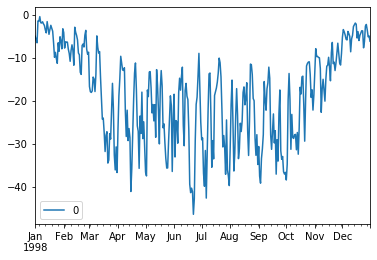

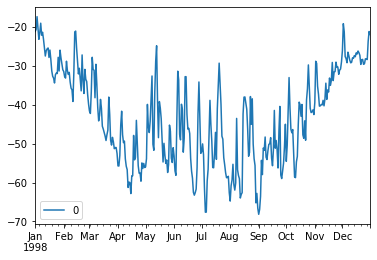

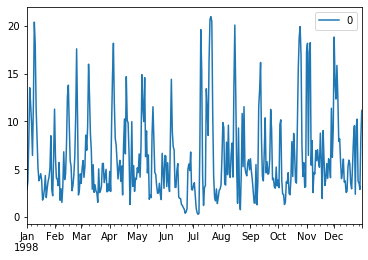

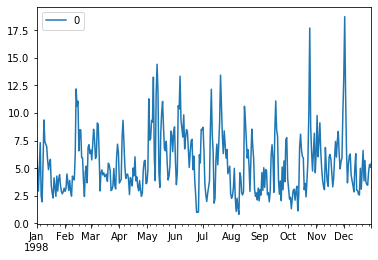

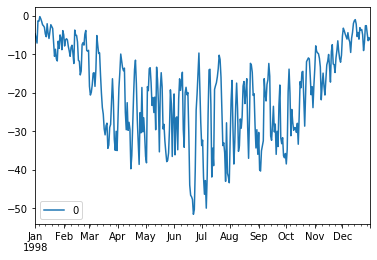

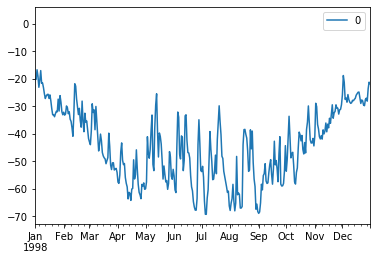

In [47]:
# File paths
aws4_path = "AWS4_DAY.txt"
aws9_path = "AWS9_DAY.txt"

# Load data (colum numbers: 4 = t2m, 8 = 10 m wind, 5 = surface temperature)
aws4_t2m = aws_timeseries(aws4_path, 4) - 273.15
aws9_t2m = aws_timeseries(aws9_path, 4) - 273.15
aws4_ws10m = aws_timeseries(aws4_path, 8)
aws9_ws10m = aws_timeseries(aws9_path, 8)
aws4_ts = aws_timeseries(aws4_path, 5) - 273.15
aws9_ts = aws_timeseries(aws9_path, 5) - 273.15

# Calculations
aws4_tdiff = aws4_ts - aws4_t2m
aws9_tdiff = aws9_ts - aws9_t2m

# Plot data
aws4_t2m.plot()
aws9_t2m.plot()
aws4_ws10m.plot()
aws9_ws10m.plot()
aws4_ts.plot()
aws9_ts.plot()

# Plot wind speed vs temperature difference 
plt.scatter(aws4_ws10m, aws4_tdiff)

# Problem 3

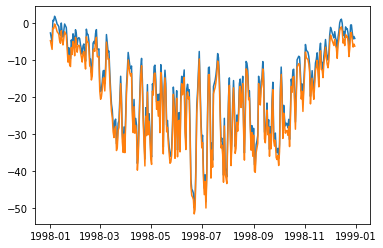

In [48]:
# Calculate surface temperature 14
aws4_OLWR = aws_timeseries(aws4_path, 14) 
aws4_ts_calc = np.power(aws4_OLWR / (0.97 * 5.67e-8), 0.25) - 273.15

# Plot
plt.plot(aws4_ts_calc)
plt.plot(aws4_ts)

# Problem 4

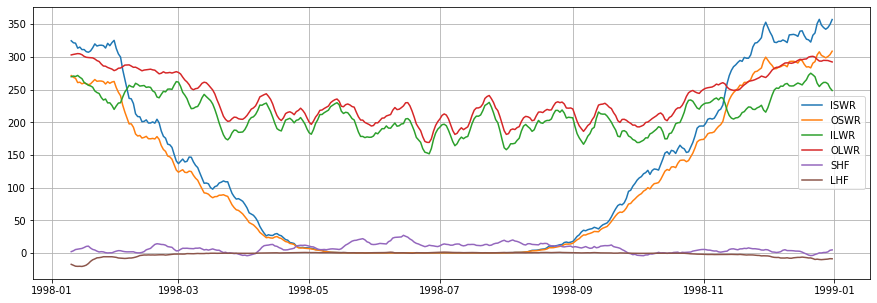

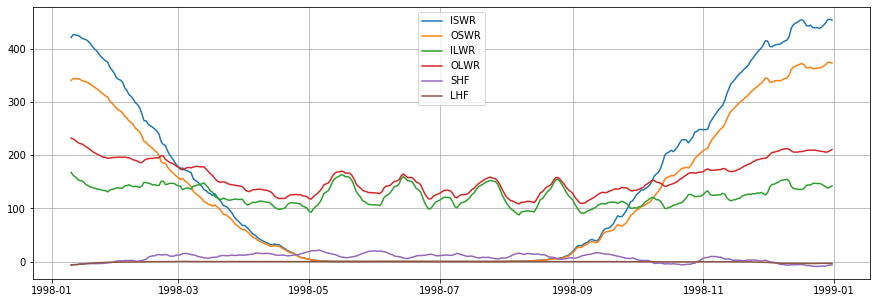

In [71]:
# Load data and perform 10 day running means
aws4_ISWR = aws_timeseries(aws4_path, 11).rolling(window=10).mean()
aws4_OSWR = aws_timeseries(aws4_path, 12).rolling(window=10).mean()
aws4_ILWR = aws_timeseries(aws4_path, 13).rolling(window=10).mean()
aws4_OLWR = aws_timeseries(aws4_path, 14).rolling(window=10).mean() 
aws4_SHF = aws_timeseries(aws4_path, 15).rolling(window=10).mean() 
aws4_LHF = aws_timeseries(aws4_path, 16).rolling(window=10).mean() 

aws9_ISWR = aws_timeseries(aws9_path, 11).rolling(window=10).mean() 
aws9_OSWR = aws_timeseries(aws9_path, 12).rolling(window=10).mean() 
aws9_ILWR = aws_timeseries(aws9_path, 13).rolling(window=10).mean() 
aws9_OLWR = aws_timeseries(aws9_path, 14).rolling(window=10).mean() 
aws9_SHF = aws_timeseries(aws9_path, 15).rolling(window=10).mean() 
aws9_LHF = aws_timeseries(aws9_path, 16).rolling(window=10).mean() 

# Plot AWS 4
fig = plt.figure(figsize=(15,5))
plt.plot(aws4_ISWR, label="ISWR")
plt.plot(aws4_OSWR, label="OSWR")
plt.plot(aws4_ILWR, label="ILWR")
plt.plot(aws4_OLWR, label="OLWR")
plt.plot(aws4_SHF, label="SHF")
plt.plot(aws4_LHF, label="LHF")
plt.legend()
plt.grid()

# Plot AWS 9
fig = plt.figure(figsize=(15,5))
plt.plot(aws9_ISWR, label="ISWR")
plt.plot(aws9_OSWR, label="OSWR")
plt.plot(aws9_ILWR, label="ILWR")
plt.plot(aws9_OLWR, label="OLWR")
plt.plot(aws9_SHF, label="SHF")
plt.plot(aws9_LHF, label="LHF")
plt.legend()
plt.grid()

# Problem 6 - Albedo

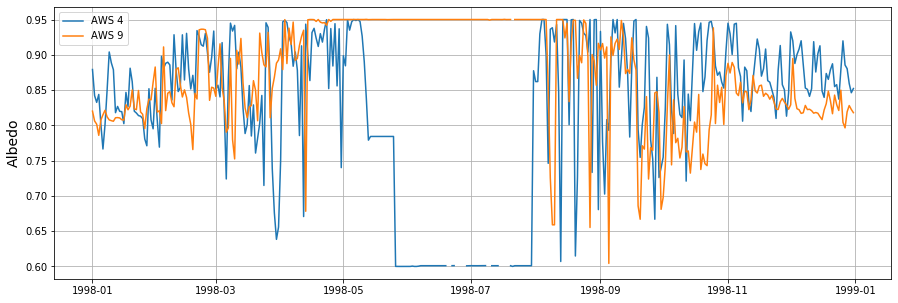

In [66]:
# Load data
aws4_ISWR = aws_timeseries(aws4_path, 11) 
aws4_OSWR = aws_timeseries(aws4_path, 12) 
aws9_ISWR = aws_timeseries(aws9_path, 11) 
aws9_OSWR = aws_timeseries(aws9_path, 12) 

# Calculate albedo
aws4_albedo = aws4_OSWR / aws4_ISWR
aws9_albedo = aws9_OSWR / aws9_ISWR

# Plot
fig = plt.figure(figsize=(15,5))
plt.plot(aws4_albedo, label="AWS 4")
plt.plot(aws9_albedo, label="AWS 9")
plt.ylabel("Albedo", fontsize=14)
plt.grid()
plt.legend()